##**Project Name**: **Supervised Regression-📉Yes Bank Stock Closing Price Prediction📈**

##### **Project Type**    - ML Model Building Using Supervised Regression
##### **Contribution**    - Individual

# **Project Summary -**

The "Regression-Yes Bank Stock Closing Price Prediction" capstone project aims to develop an accurate and reliable model for forecasting the closing prices of Yes Bank stocks. Yes Bank, a prominent financial institution, is subject to various market dynamics and economic factors that influence its stock prices. The project utilizes regression analysis, a powerful statistical method, to create a predictive model that can assist investors, traders, and financial analysts in making informed decisions.

# **Problem Statement**

In the complex landscape of financial markets, predicting stock prices accurately is a challenging task. Investors, traders, and financial analysts face difficulties in making well-informed decisions due to the lots of factors influencing stock prices. The specific challenge addressed in this capstone project is the need for a reliable regression-based model to predict the closing prices of Yes Bank stocks. The goal is to develop a robust predictive model that leverages historical stock data, financial indicators, and relevant macroeconomic variables to forecast Yes Bank's stock closing prices.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [15]:
# Import Required Libraries
import numpy as np # Used for Fast mathematical operations over arrays,Linear Algebra, Fourier Transforms, Random Number Generation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load The Dataset
data = pd.read_csv('/content/drive/MyDrive/dataset_link/data_YesBank_StockPrices.csv')

### Dataset First View

In [4]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [6]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Dataset Information

In [7]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

As we can see, there are 185 rows and 5 columns i.e. ['Date', 'Open', 'High', 'Low', 'Close']. There are zero duplicates values and non-null values. Also there is no missing values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

There are five variables in this dataset. i.e. 'Date', 'Open', 'High', 'Low', 'Close'. Out of these..

**Independent Variable** are: Date, Open, High and Low

**Dependent Variable**: Close.

**'Date':** Represents the date of the stock market data.

**'Open':** Denotes the opening price of the stock on a particular date.

**'High':** Indicates the highest price reached by the stock during the trading day.

**'Low':** Represents the lowest price reached by the stock during the trading day.

**'Close':** Denotes the closing price of the stock on a particular date.

In describe dataset, the maximum stock price open by 369.95 points and closed by 367.90 points and minimum stock price open by 105.54 and close by approx. same points.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## **3**. ***Data Wrangling***

In [12]:
# Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.
# Date Transformation: Convert a data type of column Date to datetime object format.

data["Date"] = pd.to_datetime(data["Date"],format='%b-%y')

In [13]:
# Check wether it is converted or not
data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**1: Univariate Analysis**

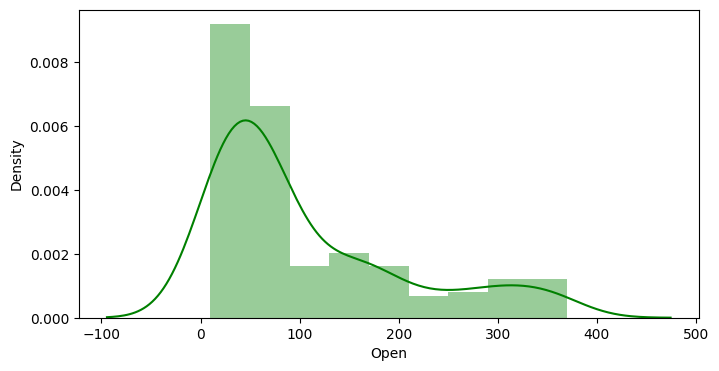

In [14]:

# Check the distribution of Open columns
plt.figure(figsize=(8,4))
sns.distplot(data['Open'],color='green',kde=True)
plt.show()

In [16]:
# Lets check skewness
data.Open.skew()

1.2657173528789976

1. Why did you pick the specific chart?
The distplot can provide a clear visual representation of the central tendency (mean, median, mode) ,the spread (standard deviation) and the skewness of the data. Also we plot the univariate variable is 'Open' stock price, so we can clearly visualize the its distribution.


2. What is/are the insight(s) found from the chart?
The Yes Bank stock opening price prediction ML model, a distribution plot of the opening price can provide several insights, including-The shape of the distribution is positively (right) skewed which is the value is 1.265 i.e. the value is greater than zero. A skewed distribution suggests that the closing price is more concentrated on one side of the mean.


3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There no negative growth in opening price stock in Yes Bank.

#### Chart - 2

**2: Bivariate Analysis**

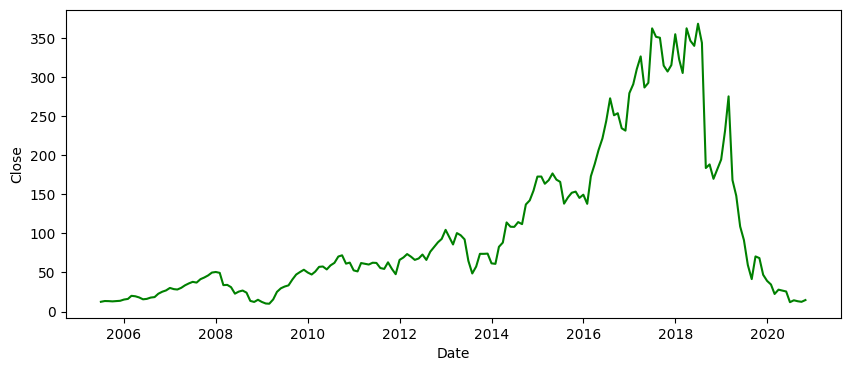

In [19]:
# Chart-2: Bivariate Analysis
# Relationship between opening and closing price stock

plt.figure(figsize=(10,4))
sns.lineplot(x='Date',y='Close',data=data, color = 'green')
plt.show()

1. Why did you pick the specific chart?
Line charts are commonly used to visualize trends and changes over time, making them suitable for representing opening and closing stock prices. Line charts inherently display a temporal relationship along the x-axis, making them ideal for representing time-series data. Also,it emphasize the continuity and connectivity of data points. Line charts are simple and easy to understand, promoting clarity in conveying the overall trends in stock prices.


2. What is/are the insight(s) found from the chart?
As we can see, the closing stock price is increasing from the year 2016 and it continues till 2018.(The closing price approx. 350+) After that, it suddenly descreases in the year end of 2018. In 2019, again suddenly it increased. In 2020, it went low closing stock price.(Stock price was ~25)


3. What all manipulations have you done and insights you found?

**Inference:**The graph demonstrates how closing price stock varies with each passing year.We can clearly see from the graph that around 2018, when the fraud case involving Rana kapoor came to light, a clear significant dip can be seen in the stock price of Yes Bank data

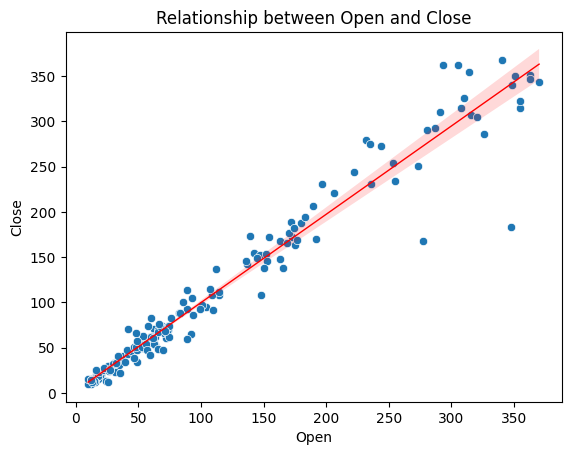

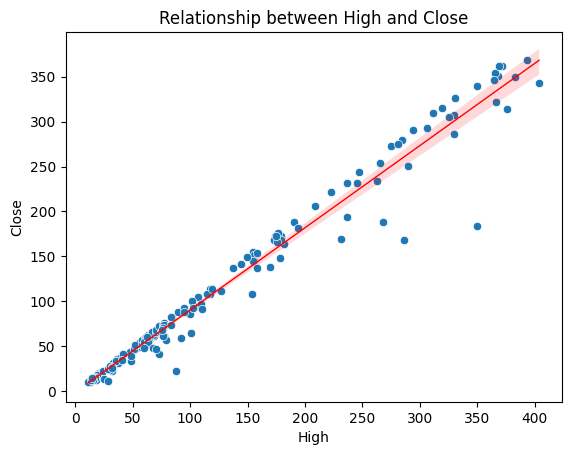

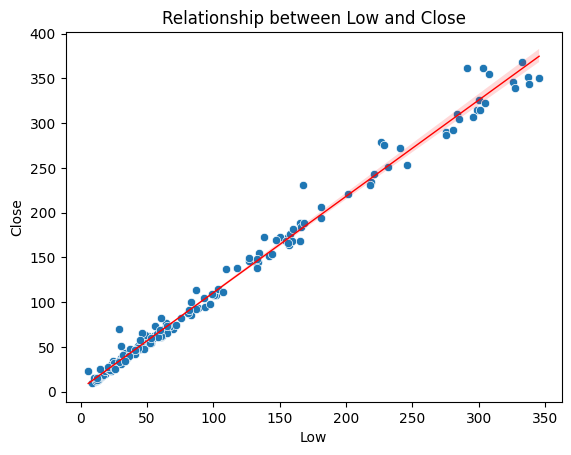

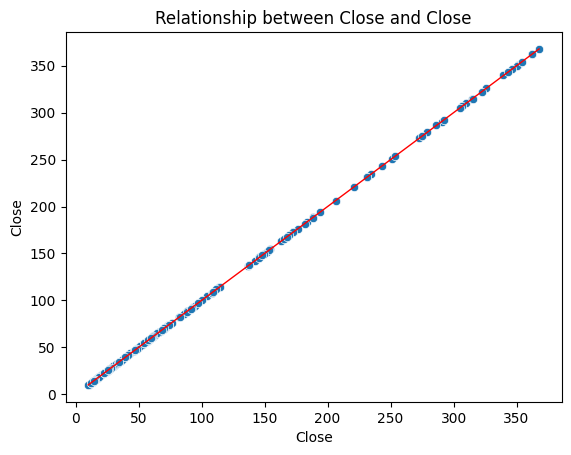

In [21]:
for i in data.columns[1:]:
    plt.title(f'Relationship between {i} and Close')
    sns.scatterplot(x=i, y='Close', data=data)
    sns.regplot(x=i, y='Close', data=data, scatter=False, color='r', line_kws={'linewidth': 1})
    plt.show()
    # To check relationship between others columns as well


**Inferences:** As we can see that there is linear relation and high correlation between each independent variables and our dependent variable.Also we can see that the value of correlation between dependent variable Close and feature High is 0.985.As we can see that there is a linear relation and very high correlation between our dependent variable and independent variables. The value of correlation between Close and Open is 0.978 and b/w Close and Low is 0.9954.

#### Chart - 3

**3: Multivariate Analysis**

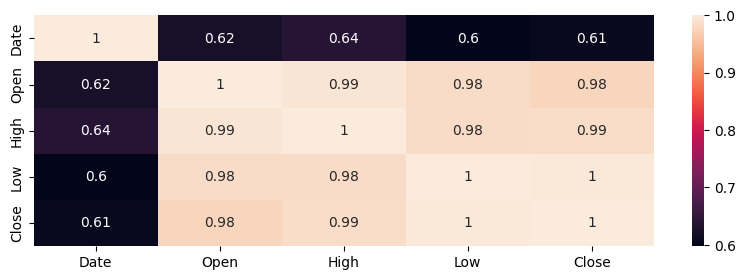

In [41]:
# Chart - 3 visualization code for Multivariate Analysis
plt.figure(figsize=(10,3))
cor = sns.heatmap(data.corr(),annot=True)

1. Why did you pick the specific chart?
A heatmap provides an easy and intuitive way to visualize patterns in a correlation matrix. It allows you to quickly identify strong positive or negative correlations between variables. The color gradient used in a heatmap makes it easy to distinguish between different levels of correlation. Heatmaps allow for the easy comparison of correlations between all pairs of variables.

2. What is/are the insight(s) found from the chart?
In the heatmap graph, there is no multi-co-relation between the variables, because the variables values are alomost ~1.